In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('News.csv',index_col=0)
dataset.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
dataset= dataset.drop(["title", "subject","date"], axis = 1)

In [ ]:
dataset.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


Remove null values

In [ ]:
dataset.isnull().sum()

title       0
text        0
subject    21
date       21
class       0
dtype: int64

Randomize datapoints

In [ ]:
dataset = dataset.sample(frac=1)
dataset.reset_index(inplace=True)
dataset.drop(["index"], axis=1, inplace=True)

Pre Processing

In [ ]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def preprocess_text(text_data):
	preprocessed_text = []

	for sentence in tqdm(text_data):
		sentence = re.sub(r'[^\w\s]', '', sentence)
		preprocessed_text.append(' '.join(token.lower()
								for token in str(sentence).split()
								if token not in stopwords.words('english')))

	return preprocessed_text

Logistic Regression

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initializing and fittng the TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dataset['text'])
y = dataset['class']

#Splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#fitting into regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

#Accuracy
accuracy_LR = accuracy_score(y_test, y_pred)

print(f'Model Accuracy: {accuracy_LR}')

Model Accuracy: 0.9871994657168299


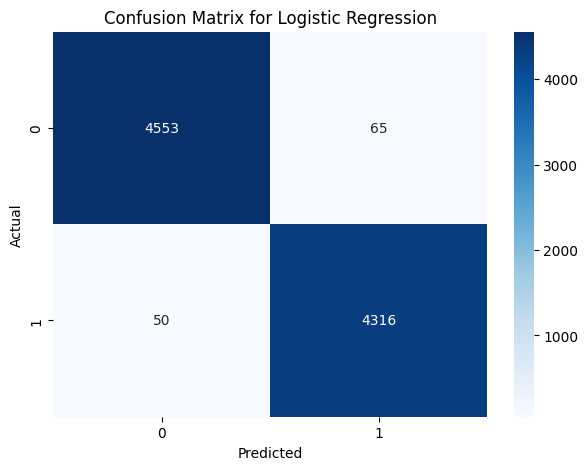

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generating confusion matrix
cm_LR = confusion_matrix(y_test, y_pred)

# Visualizing the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(7,5))
sns.heatmap(cm_LR, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

CNN

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalMaxPooling1D, Conv1D
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score

# Initializing and fitting the tokenizer
tokenizer = Tokenizer(num_words=5000) #due to error in accessing large indices of the embedding matrix, the no of words has been capped to 5000
tokenizer.fit_on_texts(dataset['text'])

# Using the tokenizer to transform the text messages in the dataset
sequences = tokenizer.texts_to_sequences(dataset['text'])

# Padding sequences to the same length
padded_sequences = pad_sequences(sequences)

#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, dataset['class'], test_size=0.2, random_state=42)

max_sequence_length = padded_sequences.shape[1]

model = Sequential([
    Embedding(input_dim=5000, output_dim=50, input_length=max_sequence_length),
    Conv1D(filters=50, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(units=10, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, dataset['class'], test_size=0.2, random_state=42)

# Compiling the model
model.compile(optimizer=Adam(0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Making predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Accuracy
accuracy_CNN = accuracy_score(y_test, y_pred)

print(f'Model Accuracy: {accuracy_CNN}')

Epoch 1/10
1123/1123 [==============================] - 148s 122ms/step - loss: 0.0274 - accuracy: 0.9917 - val_loss: 0.0091 - val_accuracy: 0.9979
Epoch 2/10
1123/1123 [==============================] - 49s 43ms/step - loss: 0.0047 - accuracy: 0.9990 - val_loss: 0.0023 - val_accuracy: 0.9996
Epoch 3/10
1123/1123 [==============================] - 31s 28ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0049 - val_accuracy: 0.9994
Epoch 4/10
1123/1123 [==============================] - 26s 23ms/step - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.0037 - val_accuracy: 0.9994
Epoch 5/10
1123/1123 [==============================] - 25s 23ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0053 - val_accuracy: 0.9993
Epoch 6/10
1123/1123 [==============================] - 21s 19ms/step - loss: 6.7678e-04 - accuracy: 0.9999 - val_loss: 0.0070 - val_accuracy: 0.9993
Epoch 7/10
1123/1123 [==============================] - 22s 19ms/step - loss: 3.0603e-04 - accuracy: 1.0000 - val_loss

281/281 [==============================] - 1s 4ms/step


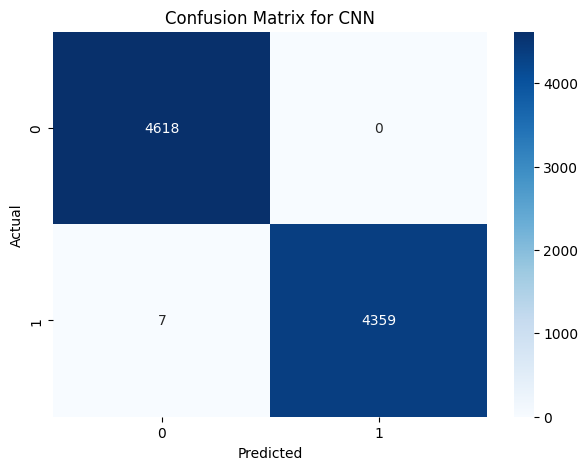

In [ ]:
# Confusion Matrix
# Making predictions with the CNN model
y_pred_CNN = (model.predict(X_test) > 0.5).astype("int32")

cm_CNN = confusion_matrix(y_test, y_pred_CNN)

plt.figure(figsize=(7,5))
sns.heatmap(cm_CNN, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for CNN')
plt.show()

RNN

In [ ]:
from keras.layers import Dense, Embedding, LSTM

model = Sequential([
    Embedding(input_dim=5000, output_dim=50, input_length=padded_sequences.shape[1]),
    LSTM(50),
    Dense(units=10, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer=Adam(0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Making predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Accuracy
accuracy_RNN = accuracy_score(y_test, y_pred)

print(f'Model Accuracy: {accuracy_RNN}')

Epoch 1/10
1123/1123 [==============================] - 282s 247ms/step - loss: 0.0952 - accuracy: 0.9642 - val_loss: 0.0055 - val_accuracy: 0.9986
Epoch 2/10
1123/1123 [==============================] - 185s 165ms/step - loss: 0.0046 - accuracy: 0.9988 - val_loss: 0.0051 - val_accuracy: 0.9989
Epoch 3/10
1123/1123 [==============================] - 174s 155ms/step - loss: 0.0042 - accuracy: 0.9989 - val_loss: 0.0133 - val_accuracy: 0.9961
Epoch 4/10
1123/1123 [==============================] - 173s 154ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 0.0102 - val_accuracy: 0.9982
Epoch 5/10
1123/1123 [==============================] - 170s 152ms/step - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.0047 - val_accuracy: 0.9990
Epoch 6/10
1123/1123 [==============================] - 165s 147ms/step - loss: 0.0076 - accuracy: 0.9977 - val_loss: 0.0080 - val_accuracy: 0.9978
Epoch 7/10
1123/1123 [==============================] - 165s 147ms/step - loss: 0.0053 - accuracy: 0.9985 - val_

281/281 [==============================] - 15s 53ms/step


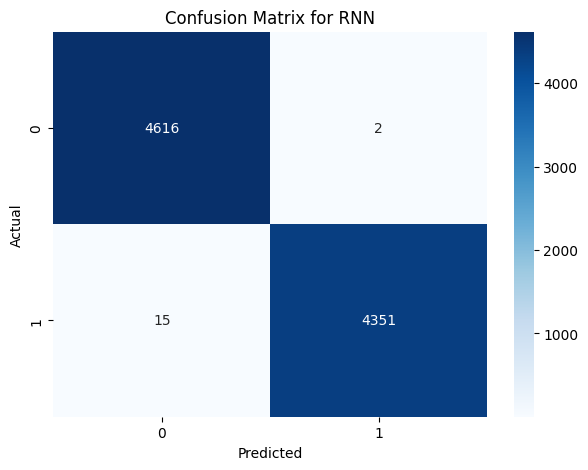

In [ ]:
#Confusion Matrix
# Making predictions with the RNN model
y_pred_RNN = (model.predict(X_test) > 0.5).astype("int32")

cm_RNN = confusion_matrix(y_test, y_pred_RNN)

plt.figure(figsize=(7,5))
sns.heatmap(cm_RNN, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RNN')
plt.show()

BERT and Transformers

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Loading the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

# Tokenizing the text data
input_ids = []
attention_masks = []

for text in dataset['text']:
    encoded_dict = tokenizer.encode_plus(
        text,
        add_special_tokens = True,
        max_length = 64,
        pad_to_max_length = True,
        return_attention_mask = True,
        return_tensors = 'tf',
    )

    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

input_ids = tf.concat(input_ids, axis=0)
attention_masks = tf.concat(attention_masks, axis=0).numpy()  # Convert to numpy array
labels = tf.convert_to_tensor(dataset['class'])

# Compiling the model
model.compile(optimizer=Adam(0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(input_ids.numpy(), labels.numpy(), test_size=0.2, random_state=42)
train_masks, test_masks = train_test_split(attention_masks, test_size=0.2, random_state=42)

# Training the model
model.fit([X_train, train_masks], y_train, epochs=10, batch_size=32)

# Make predictions
predictions = model.predict([X_test, test_masks])

# Extract logits
logits = predictions.logits

# Get class predictions
y_pred = tf.argmax(logits, axis=-1).numpy()

# Accuracy
accuracy_BERT = accuracy_score(y_test, y_pred)

print(f'Model Accuracy: {accuracy_BERT}')

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Epoch 1/10
1123/1123 [==============================] - 489s 390ms/step - loss: 8.0100 - accuracy: 0.5253
Epoch 2/10
1123/1123 [==============================] - 434s 386ms/step - loss: 8.0135 - accuracy: 0.5255
Epoch 3/10
1123/1123 [==============================] - 433s 386ms/step - loss: 8.0135 - accuracy: 0.5255
Epoch 4/10
1123/1123 [==============================] - 434s 387ms/step - loss: 8.0135 - accuracy: 0.5255
Epoch 5/10
1123/1123 [==============================] - 434s 386ms/step - loss: 8.0135 - accuracy: 0.5255
Epoch 6/10
1123/1123 [==============================] - 434s 387ms/step - loss: 8.0135 - accuracy: 0.5255
Epoch 7/10
1123/1123 [==============================] - 434s 386ms/step - loss: 8.0135 - accuracy: 0.5255
Epoch 8/10
1123/1123 [==============================] - 434s 387ms/step - loss: 8.0135 - accuracy: 0.5255
Epoch 9/10
1123/1123 [==============================] - 434s 386ms/step - loss: 8.0135 - accuracy: 0.5255
Epoch 10/10
281/281 [=========================

281/281 [==============================] - 43s 152ms/step


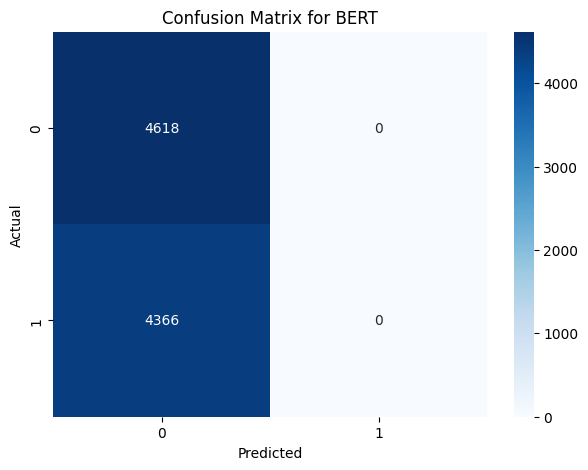

In [ ]:
# Making predictions with the BERT model
predictions = model.predict([X_test, test_masks])

# Extracting the logits from the predictions
logits = predictions.logits

# Applying softmax to convert logits to probabilities
probabilities = tf.nn.softmax(logits, axis=-1)

# Getting the most likely class
y_pred_BERT = tf.argmax(probabilities, axis=1).numpy()

cm_BERT = confusion_matrix(y_test, y_pred_BERT)

plt.figure(figsize=(7,5))
sns.heatmap(cm_BERT, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for BERT')
plt.show()

All accuracy scores

In [ ]:
print(accuracy_LR)
print(accuracy_CNN)
print(accuracy_RNN)
print(accuracy_BERT)

0.9871994657168299
0.9992208370436332
0.9981077471059662
0.5140249332146037


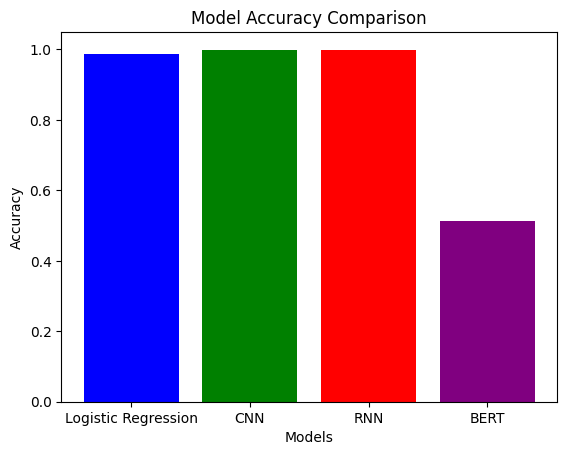

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores from the models
accuracy_scores = [accuracy_LR, accuracy_CNN, accuracy_RNN, accuracy_BERT]

# Model names
models = ['Logistic Regression', 'CNN', 'RNN', 'BERT']

# Create bar chart
plt.bar(models, accuracy_scores, color=['blue', 'green', 'red', 'purple'])

# Title and labels
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Display the chart
plt.show()

Experiment with a complex deep-learning algorithm to get the best results for this data

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Conv1D, GlobalMaxPooling1D
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Initializing and fitting the tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(dataset['text'])

# Using the tokenizer to transform the text messages in the dataset
sequences = tokenizer.texts_to_sequences(dataset['text'])

# Padding sequences to the same length
padded_sequences = pad_sequences(sequences)

#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, dataset['class'], test_size=0.2, random_state=42)

max_sequence_length = padded_sequences.shape[1]

# Defining the model
model = Sequential([
    Embedding(input_dim=5000, output_dim=50, input_length=max_sequence_length),
    Conv1D(filters=50, kernel_size=5, activation='relu'),
    LSTM(50),
    Dense(units=10, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer=Adam(0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Making predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Accuracy
accuracy_new_model = accuracy_score(y_test, y_pred)

print(f'Model Accuracy: {accuracy_new_model}')

Epoch 1/10
1123/1123 [==============================] - 295s 247ms/step - loss: 0.1110 - accuracy: 0.9587 - val_loss: 0.0602 - val_accuracy: 0.9832
Epoch 2/10
1123/1123 [==============================] - 197s 176ms/step - loss: 0.0131 - accuracy: 0.9962 - val_loss: 0.0165 - val_accuracy: 0.9947
Epoch 3/10
1123/1123 [==============================] - 182s 162ms/step - loss: 0.0074 - accuracy: 0.9980 - val_loss: 0.0103 - val_accuracy: 0.9973
Epoch 4/10
1123/1123 [==============================] - 183s 163ms/step - loss: 0.0083 - accuracy: 0.9977 - val_loss: 0.0084 - val_accuracy: 0.9979
Epoch 5/10
1123/1123 [==============================] - 175s 156ms/step - loss: 0.0057 - accuracy: 0.9987 - val_loss: 0.0114 - val_accuracy: 0.9976
Epoch 6/10
1123/1123 [==============================] - 175s 156ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0099 - val_accuracy: 0.9973
Epoch 7/10
1123/1123 [==============================] - 174s 155ms/step - loss: 0.0056 - accuracy: 0.9986 - val_